In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# b)
college = pd.read_csv('../data/College.csv', index_col=0)

In [3]:
# c)
# i. use summary() to get numeral summary of variables in data set

# list index (pandas' row names) and columns (pandas' headers)
# print college.index
# print college.columns

# but what I'm really looking for is DESCRIBE!
college.describe()#.sort_index(axis=u'Accept', ascending=False)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113eeecd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1145a8d10>]], dtype=object)

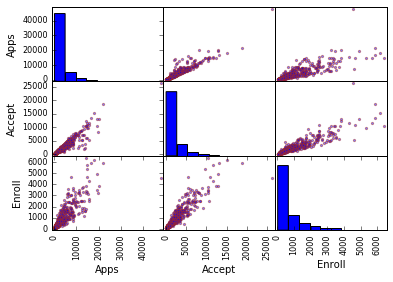

In [4]:
# c) ii. Produce a scatterplot matrix of the first 10 variables.
# college[:, 0:10] # doesn't work - pd.DataFrames can be sliced by index (row), sure, but labels must be named and accessed using the .loc method.
# college_slice = college.loc[:, college.columns[0]:college.columns[3]] # this range is inclusive.
# college_slice = college.iloc[:, 0:4] # also works - i stands for index (location...?).
college_slice = college.ix[:, 0:4] # and apparently, ix accepts any input, where loc requires labels and iloc requires indexes.
pd.tools.plotting.scatter_matrix(college_slice, color='brown')

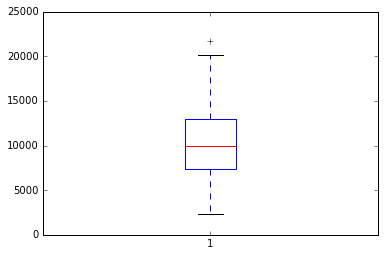

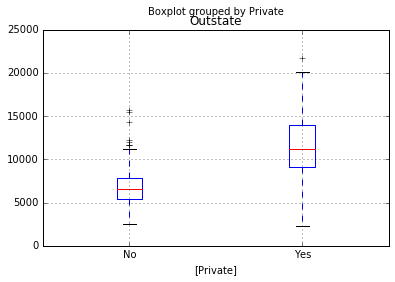

In [9]:
# c) iii. use plot() to produce side-by-side boxplots of Outstate vs Private.
plt.boxplot(college['Outstate']) # Matplotlib
college.ix[:,['Private', 'Outstate']].boxplot(by='Private') # Pandas

array([<matplotlib.axes._subplots.AxesSubplot object at 0x117adef50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a734050>], dtype=object)

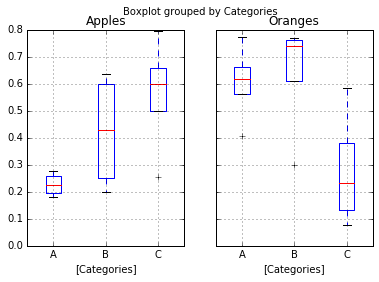

In [5]:
# random example from http://stackoverflow.com/questions/16592222/matplotlib-group-boxplots
np.random.rand(12,2)
df = pd.DataFrame(np.random.rand(12,2), columns=['Apples', 'Oranges'] )
df['Categories'] = pd.Series(list('AAAABBBBCCCC'))
df.boxplot(by="Categories")


In [25]:
# c) iv. Create a new variable, "Elite", that is "Yes" for those colleges with >50% of students being in the top 10% of their high school class.
college["Elite"] = "No"
# If KeyError: 'the label [<function <lambda> at 0x134b29578>] is not in the [index]' - update to 0.18.1 with conda list, conda install pandas.
college.loc[lambda df: df.Top10perc > 50, "Elite"] = "Yes"
college.loc[:, ["Top10perc", "Elite"]].head()

,Top10perc,Elite
Abilene Christian University,23,No
Adelphi University,16,No
Adrian College,22,No
Agnes Scott College,60,Yes
Alaska Pacific University,16,No


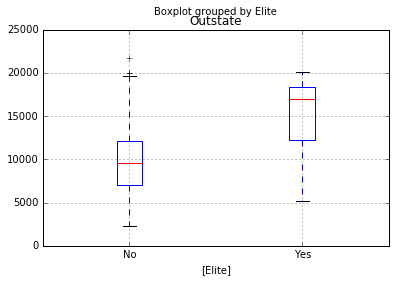

In [27]:
# c) iv. part 2: side by side boxplots again.
college.ix[:, ["Outstate", "Elite"]].boxplot(by="Elite")

(array([  4.,  13.,  50.,  43.,  76.,  66.,  81.,  62.,  77.,  65.,  49.,
         45.,  27.,  22.,  24.,  20.,  24.,  23.,   5.,   1.]),
 array([  2340.,   3308.,   4276.,   5244.,   6212.,   7180.,   8148.,
          9116.,  10084.,  11052.,  12020.,  12988.,  13956.,  14924.,
         15892.,  16860.,  17828.,  18796.,  19764.,  20732.,  21700.]),
 <a list of 20 Patch objects>)

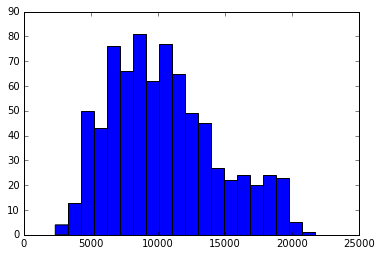

In [31]:
# c) v.
plt.hist(college.ix[:, "Outstate"], bins=20)